<h1><b>Linear Regression on Boston House Price Dataset</b></h1>
<h4>Editor: Daniel Wang</h4>

The Boston House Price Dataset is a classic dataset for machine learning beginners to first explore the wonderfulness of regression models. This dataset involves the prediction of a house price in thousands of dollars given details of the house and its neighborhood. Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970.

<h2><b><u>Data Exploration</u></b></h2>

First, we may want to explore this dataset first. There are 506 observations with 13 input variables and 1 output variable. 

The variable names are as follows:

1. CRIM: per capita crime rate by town.
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of nonretail business acres per town.
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5. NOX: nitric oxides concentration (parts per 10 million).
6. RM: average number of rooms per dwelling.
7. AGE: proportion of owner-occupied units built prior to 1940.
8. DIS: weighted distances to five Boston employment centers.
9. RAD: index of accessibility to radial highways.
10. TAX: full-value property-tax rate per \$10,000
11. PTRATIO: pupil-teacher ratio by town.
12. B: 1000(Bk – 0.63)^2 where Bk is the proportion of blacks by town.
13. LSTAT: % lower status of the population.
14. MEDV: Median value of owner-occupied homes in $1000s.

Here, the MEDV is the target we want to find. Let's import some Python libraries to step further:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.datasets import load_boston

In [ ]:
X, y = load_boston(return_X_y=True)

In [ ]:
X.shape, y.shape

((506, 13), (506,))

We have 506 data entries. For each data entry, there are 13 features and 1 label.

Let's use *pd.DataFrame* to see the description of the dataset:

In [ ]:
df = pd.DataFrame(X, columns=[
  "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", 
  "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]
)
df["MEDV"] = y
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


We found each feature has a different range of values. Before the training stage, we need to rescale our data in order to eliminate the model sensitivity on the data scale. I will do this in the future section.

First, let's take a glimpse on the age distribution:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


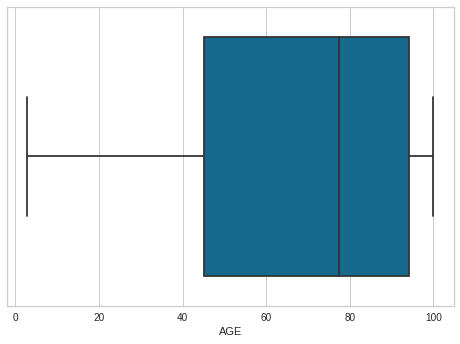

In [ ]:
sns.boxplot(df.AGE)

We found that most people in this dataset are the elderly. Indeed, people who possess estates are often the elderly.

After the data exploration, let's try some machine learning models on it.

<h2><b><u>Model 1: LR(Linear Regression)</u></b></h2>

This model is simply a regression model. We did not try some feature engineering techniques here, so we can see how important feature engineering is by showing the comparison result in the future section.

For a fair comparison, let's split our data and fix the train/test set:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

As described above, our features have different ranges, so we need to rescale them before applying them to our regression model:

In [ ]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
X_train_s = s.fit_transform(X_train)
X_test_s = s.transform(X_test)

Now let's try our naive model:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()

In [ ]:
lr.fit(X_train_s, y_train)
lr_pred = lr.predict(X_test_s)

r2_score(lr_pred, y_test)

0.5291006947760482

We found the R2 score is merely 0.53. This will become our baseline model, and we hope that applying more machine learning techniques will further improve our model.

<h2><b><u>Model 2: PolyFeat(Polynomial Feature) + LR</u></b></h2>

One of the assumptions made by a linear regressor is that the relationship between the independent variables and the dependent variable. Therefore, given a dependent variable (MEDV), we may want to see whether each scatter plots are linear:

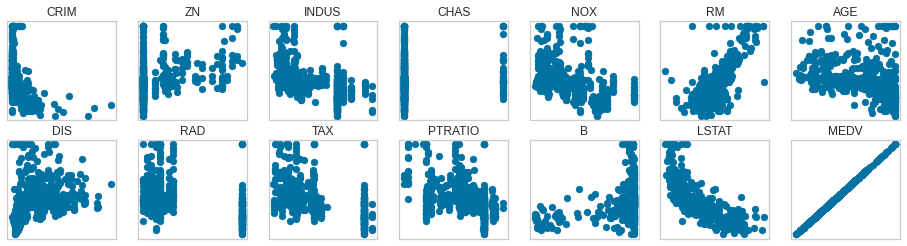

In [ ]:
fig, axes = plt.subplots(2, 7)
fig.set_size_inches(16, 4)

for key, ax in zip(df.keys(), axes.ravel()):
  ax.scatter(df[key], df.MEDV)
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(key)

Obviously, none of the features are linear to MEDV (except itself).

To solve such an issue, we may need to consider a combination of polynomial features:

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
pf = PolynomialFeatures(degree=2, include_bias=False)

X_train_pf = pf.fit_transform(X_train)
X_train_pf_s = s.fit_transform(X_train_pf)

X_test_pf = pf.fit_transform(X_test)
X_test_pf_s = s.fit_transform(X_test_pf)

We should add polynomial features before scaling the features since we should guarantee the range of features are constants.

After adding some polynomial features, let's see the performance:

In [ ]:
lr.fit(X_train_pf_s, y_train)
lr_pred = lr.predict(X_test_pf_s)

r2_score(lr_pred, y_test)

0.7254992691042563

0.73 is significantly higher than 0.53, which represents that **adding polynomial features will boost the model prediction performance**.

Note: the order of ***train_test_split*** and ***PolynomialFeatures*** is not important. To prove this, we can try to transform the features first, and then apply data splitting, to see if the result is still the same as before:

In [ ]:
X_pf = pf.fit_transform(X)
X_pf_train, X_pf_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.3, random_state=0)

X_pf_train_s = s.fit_transform(X_pf_train)
X_pf_test_s = s.fit_transform(X_pf_test)

lr.fit(X_pf_train_s, y_train)
lr_pred = lr.predict(X_pf_test_s)

r2_score(lr_pred, y_test)

0.7254992691042563

They are numerically identical, which proves the statement above.

Next, we may need to figure out whether the boost of performance is due to chance or not. To test it, let's conduct 100 experiments and see the averaged result (we use different random seeds to generate different data splittings and to ensure the output is constant):

Text(0.5, 1.0, 'Ablation Study on Polynomial Features Transformation')

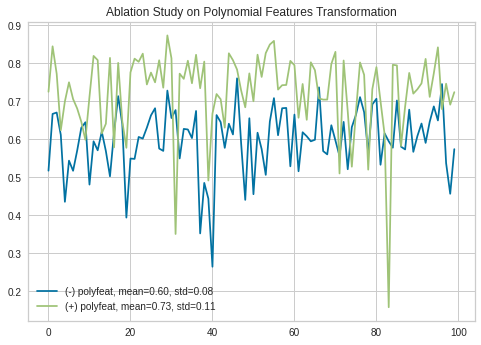

In [ ]:
r2_lst1, r2_lst2 = [], []

for seed in range(0, 100):
  X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=seed)

  # without polyfeat
  X_train2_s = s.fit_transform(X_train2)
  X_test2_s = s.fit_transform(X_test2)

  lr.fit(X_train2_s, y_train2)
  lr_pred = lr.predict(X_test2_s)
  r2_lst1.append(r2_score(lr_pred, y_test2))

  # with polyfeat
  X_train2_pf = pf.fit_transform(X_train2)
  X_train2_pf_s = s.fit_transform(X_train2_pf)

  X_test2_pf = pf.fit_transform(X_test2)
  X_test2_pf_s = s.fit_transform(X_test2_pf)

  lr.fit(X_train2_pf_s, y_train2)
  lr_pred = lr.predict(X_test2_pf_s)
  r2_lst2.append(r2_score(lr_pred, y_test2))

mean1, std1 = np.mean(r2_lst1), np.std(r2_lst1)
mean2, std2 = np.mean(r2_lst2), np.std(r2_lst2)
plt.plot(r2_lst1, label="(-) polyfeat, mean={:.2f}, std={:.2f}".format(mean1, std1))
plt.plot(r2_lst2, label="(+) polyfeat, mean={:.2f}, std={:.2f}".format(mean2, std2))
plt.legend(loc="best")
plt.title("Ablation Study on Polynomial Features Transformation")

We can see that adding polynomial features usually outperforms the baseline, so it is not due to chance at all.

<h2><b><u>Model 3: PolyFeat + Boxcox + LR</u></b></h2>

The second assumption of a linear regressor is that the residuals of the model are normally distributed. However, judging the normality of residuals is too case-by-case. Instead, we can make our target variable normally distributed. As described by the teacher, it will often lead to better results. 

One of the popular transformation methods is "boxcox". It is a parametrized transformation that tries to get distributions "as close to a normal distribution as possible", and is defined as:

$$ \text{boxcox}(y_i, {\lambda}) = \frac{y_i^{\lambda} - 1}{\lambda} $$

Which can be thought of as a generalization of the square root function.

Now let's do the transformation:

In [ ]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox

In [ ]:
y_train_bc, lam = boxcox(y_train)
lam

0.2024398264869742

We see the lambda value is approximately 0.2, which means that the original equation can be re-written as:
$$ \text{boxcox}(y_i, 0.2) = \frac{y_i^{0.2} - 1}{0.2} $$

To test whether the boxcox can transform our target distribution into a normal distribution, we use D'Agostino K^2 Test. The null hypothesis and the alternative hypothesis are:

*   H0: The distribution is approximately normal.
*   H1: The distribution is not approximately normal.

Next, we do the test:

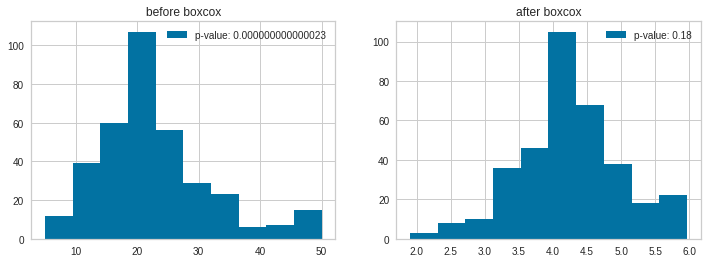

In [ ]:
from scipy.stats.mstats import normaltest

_, p1 = normaltest(y_train)
_, p2 = normaltest(y_train_bc)

fig, axes = plt.subplots(1, 2)
fig.set_size_inches(12, 4)
axes[0].hist(y_train, label="p-value: {:.15f}".format(p1))
axes[0].set_title("before boxcox")
axes[0].legend(loc="best")
axes[1].hist(y_train_bc, label="p-value: {:.2f}".format(p2))
axes[1].set_title("after boxcox")
axes[1].legend(loc="best")

We found that before the transformation, the p-value is significantly low that we reject the null hypothesis that the original target distribution is normal. However, after the boxcox transformation, we get a p-value higher than 0.05, which represents that it is normally distributed.

Next, let's test whether making the target normally distributed will boost the performance or not:

In [ ]:
lr.fit(X_train_pf_s, y_train_bc)
lr_pred_bc = lr.predict(X_test_pf_s)
lr_pred = inv_boxcox(lr_pred_bc, lam)

r2_score(lr_pred, y_test)

0.6457873937889614

Sadly, we found that the performance even decrease! It does not match the case in "02a_LAB_Transforming_Target.ipynb" 

Perhaps, it may be owing to the experimental bias. Therefore, I run more experiment to see the trend:

Text(0.5, 1.0, 'Ablation Study on Boxcox Transformation')

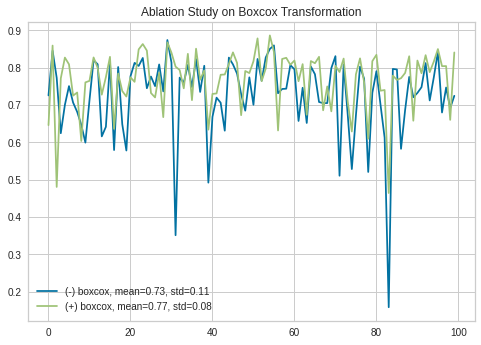

In [ ]:
r2_lst1, r2_lst2 = [], []

for seed in range(0, 100):
  X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=seed)

  X_train2_pf = pf.fit_transform(X_train2)
  X_train2_pf_s = s.fit_transform(X_train2_pf)

  X_test2_pf = pf.fit_transform(X_test2)
  X_test2_pf_s = s.fit_transform(X_test2_pf)

  # without boxcox
  lr.fit(X_train2_pf_s, y_train2)

  lr_pred = lr.predict(X_test2_pf_s)
  r2_lst1.append(r2_score(lr_pred, y_test2))

  # with boxcox
  y_train2_bc, lam2 = boxcox(y_train2)
  lr.fit(X_train2_pf_s, y_train2_bc)

  lr_pred_bc = lr.predict(X_test2_pf_s)
  lr_pred = inv_boxcox(lr_pred_bc, lam2)
  r2_lst2.append(r2_score(lr_pred, y_test2))

mean1, std1 = np.mean(r2_lst1), np.std(r2_lst1)
mean2, std2 = np.mean(r2_lst2), np.std(r2_lst2)
plt.plot(r2_lst1, label="(-) boxcox, mean={:.2f}, std={:.2f}".format(mean1, std1))
plt.plot(r2_lst2, label="(+) boxcox, mean={:.2f}, std={:.2f}".format(mean2, std2))
plt.legend(loc="best")
plt.title("Ablation Study on Boxcox Transformation")

It turned out that the boxcox method will slightly boost the performance on average. In our first trial, however, the performance drops.

To make our model simple, I do not perform boxcox transformation in  future sections, since it cannot guarantee to have better results.

<h2><b><u>Model 4: PolyFeat + LR + Regularization</u></b></h2>

Applying regularization makes the model more stable and less likely to become overfitting. In this section, let's try Lasso (L1) and Ridge (L2) regression to see whether there is any performance boost.

First, we use Lasso regression model:

In [ ]:
from sklearn.linear_model import Lasso, Ridge

In [ ]:
lasso = Lasso()
lasso.fit(X_train_pf_s, y_train)

lasso_pred = lasso.predict(X_test_pf_s)
r2_score(lasso_pred, y_test)

0.34422896434039185

However, the performance significantly drops!

Perhaps, our alpha is too high to make most of the coefficients zero out. Therefore, we try a smaller alpha:

In [ ]:
lasso = Lasso(alpha=0.05, max_iter=10000)
lasso.fit(X_train_pf_s, y_train)

lasso_pred = lasso.predict(X_test_pf_s)
r2_score(lasso_pred, y_test)

0.7209799338750233

Then the performance does not drop greatly.

To see whether Lasso will enhance the performance, let's try more experiments:

Text(0.5, 1.0, 'Ablation Study on Polynomial Features Transformation')

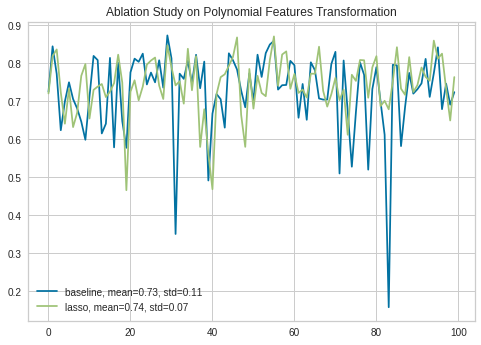

In [ ]:
r2_lst1, r2_lst2 = [], []

for seed in range(0, 100):
  X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=seed)

  X_train2_pf = pf.fit_transform(X_train2)
  X_train2_pf_s = s.fit_transform(X_train2_pf)

  X_test2_pf = pf.fit_transform(X_test2)
  X_test2_pf_s = s.fit_transform(X_test2_pf)

  # baseline
  lr.fit(X_train2_pf_s, y_train2)
  lr_pred = lr.predict(X_test2_pf_s)
  r2_lst1.append(r2_score(lr_pred, y_test2))

  # lasso
  lasso.fit(X_train2_pf_s, y_train2)
  lasso_pred = lasso.predict(X_test2_pf_s)
  r2_lst2.append(r2_score(lasso_pred, y_test2))

mean1, std1 = np.mean(r2_lst1), np.std(r2_lst1)
mean2, std2 = np.mean(r2_lst2), np.std(r2_lst2)
plt.plot(r2_lst1, label="baseline, mean={:.2f}, std={:.2f}".format(mean1, std1))
plt.plot(r2_lst2, label="lasso, mean={:.2f}, std={:.2f}".format(mean2, std2))
plt.legend(loc="best")
plt.title("Ablation Study on Lasso Regularization")

We see that Lasso outputs nearly the same mean of R2 score, but lower standard deviation. We can say that although Lasso does not guarantee better performances, it will make the result more stable (i.e. less likely to be influenced by experimental bias).

However, Lasso use gradient descent approach to optimize the loss, which requires us to spend extra time. Therefore, it is not recommended to use Lasso regression to this dataset.

Next, let's try a different regularization method, named Ridge:

In [ ]:
ridge = Ridge()
ridge.fit(X_train_pf_s, y_train)

ridge_pred = ridge.predict(X_test_pf_s)
r2_score(ridge_pred, y_test)

0.7689791779003794

This time, 0.76 seems to represents it outperforms the method without regularization (0.73). To see whether it is caused by chances, let's try more experiments:

Text(0.5, 1.0, 'Ablation Study on Ridge Regularization')

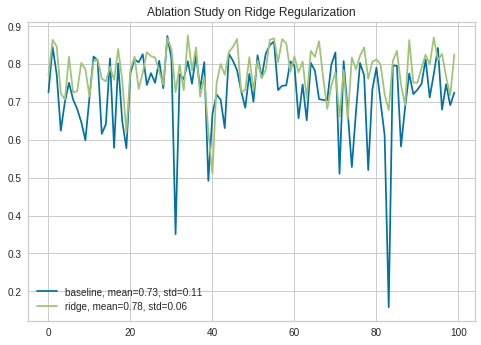

In [ ]:
r2_lst1, r2_lst2 = [], []

for seed in range(0, 100):
  X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=seed)

  X_train2_pf = pf.fit_transform(X_train2)
  X_train2_pf_s = s.fit_transform(X_train2_pf)

  X_test2_pf = pf.fit_transform(X_test2)
  X_test2_pf_s = s.fit_transform(X_test2_pf)

  # baseline
  lr.fit(X_train2_pf_s, y_train2)
  lr_pred = lr.predict(X_test2_pf_s)
  r2_lst1.append(r2_score(lr_pred, y_test2))

  # ridge
  ridge.fit(X_train2_pf_s, y_train2)
  ridge_pred = ridge.predict(X_test2_pf_s)
  r2_lst2.append(r2_score(ridge_pred, y_test2))

mean1, std1 = np.mean(r2_lst1), np.std(r2_lst1)
mean2, std2 = np.mean(r2_lst2), np.std(r2_lst2)
plt.plot(r2_lst1, label="baseline, mean={:.2f}, std={:.2f}".format(mean1, std1))
plt.plot(r2_lst2, label="ridge, mean={:.2f}, std={:.2f}".format(mean2, std2))
plt.legend(loc="best")
plt.title("Ablation Study on Ridge Regularization")

We see that Ridge regression has a higher mean, and a lower standard deviation of R2 scores, which means that **Ridge regression outperforms and can stabilize the original method**.

<h2><b><u>Conclusions</u></b></h2>

In this dataset, we found:

1.   Using polynomial features will significantly increase the performance
2.   Using Boxcox label transformation will slightly increase the performance on average, and will make the result more stable.
3.   Using L1 regularization does not guarantee the increase of the performance but will make the result more stable. However, it takes too much time to train, and sometimes too large alpha will drop the performance greatly.
4.   Using L2 regularization will increase the performance on average and will make the result more stable.

Therefore, we can say that **Ridge Regression with Polynomial Features** is the best method to inference the Boston House Price Dataset.

<h2><b><u>Future Works</u></b></h2>

In theory, a linear regression problem assumes normality. However, we found transforming our target into a normal distribution does not guarantee an increase in performance. We may need to investigate deeper reasons for that in the future.